#Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Conhecendo os Metadados

##Dataset Combustíveis

In [ ]:
# df = pd.read_csv("https://storage.googleapis.com/historico_preco/ca-2004-20224.csv", sep=",")
df = pd.read_csv("https://storage.googleapis.com/historico_preco/ca-2004-2024.csv", sep=",")

<ipython-input-3-765ad055ea57>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://storage.googleapis.com/historico_preco/ca-2004-2024.csv", sep=",")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15616599 entries, 0 to 15616598
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Estado - Sigla   object
 1   Municipio        object
 2   Revenda          object
 3   Produto          object
 4   Data da Coleta   object
 5   Valor de Venda   object
 6   Valor de Compra  object
 7   Bandeira         object
dtypes: object(8)
memory usage: 953.2+ MB


In [ ]:
df.head()

,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Bandeira
0,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,GASOLINA,11/05/2004,"1,967","1,6623",PETROBRAS DISTRIBUIDORA S.A.
1,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,ETANOL,11/05/2004,"0,899","0,6282",PETROBRAS DISTRIBUIDORA S.A.
2,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,DIESEL,11/05/2004,"1,299","1,1704",PETROBRAS DISTRIBUIDORA S.A.
3,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,10/05/2004,"1,85","1,67",BRANCA
4,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,10/05/2004,"0,78","0,48",BRANCA


##Dataset Dólar

https://br.investing.com/currencies/usd-brl-historical-data

In [ ]:
df_dolar = pd.read_csv("https://storage.googleapis.com/historico_preco/dolar.csv", sep=",")

In [ ]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      5387 non-null   object
 1   Último    5387 non-null   object
 2   Abertura  5387 non-null   object
 3   Máxima    5387 non-null   object
 4   Mínima    5387 non-null   object
 5   Vol.      1032 non-null   object
 6   Var%      5387 non-null   object
dtypes: object(7)
memory usage: 294.7+ KB


In [ ]:
df_dolar.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
5382,14.05.2004,"3,0900","3,1340","3,1320","3,0700",NaN,"-1,28%"
5383,13.05.2004,"3,1300","3,1413","3,1480","3,1080",NaN,"-0,35%"
5384,12.05.2004,"3,1410","3,0700","3,1480","3,0700",NaN,"2,18%"
5385,11.05.2004,"3,0740","3,1410","3,1380","3,0700",NaN,"-2,10%"
5386,10.05.2004,"3,1400","3,0570","3,1480","3,0980",NaN,"2,58%"


#Tratando os Dados

##Dataset Combustíveis

###Mudando os tipos das variáveis "Valor de Venda" e "Valor de Compra"

In [ ]:
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype('float64')
df['Valor de Compra'] = df['Valor de Compra'].str.replace(',', '.').astype('float64')

AttributeError: Can only use .str accessor with string values!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15616599 entries, 0 to 15616598
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Estado - Sigla   object        
 1   Municipio        object        
 2   Revenda          object        
 3   Produto          object        
 4   Data da Coleta   datetime64[ns]
 5   Valor de Venda   float64       
 6   Valor de Compra  float64       
 7   Bandeira         object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 953.2+ MB


###Mudando o tipo da variável "Data da Coleta"

In [ ]:
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')

In [ ]:
# df['Data da Coleta'] = df['Data da Coleta'].dt.strftime('%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15616599 entries, 0 to 15616598
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Estado - Sigla   object        
 1   Municipio        object        
 2   Revenda          object        
 3   Produto          object        
 4   Data da Coleta   datetime64[ns]
 5   Valor de Venda   float64       
 6   Valor de Compra  float64       
 7   Bandeira         object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 953.2+ MB


In [ ]:
df.head()

,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Bandeira
0,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,GASOLINA,2004-05-11,1.967,1.6623,PETROBRAS DISTRIBUIDORA S.A.
1,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,ETANOL,2004-05-11,0.899,0.6282,PETROBRAS DISTRIBUIDORA S.A.
2,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,DIESEL,2004-05-11,1.299,1.1704,PETROBRAS DISTRIBUIDORA S.A.
3,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,2004-05-10,1.850,1.6700,BRANCA
4,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,2004-05-10,0.780,0.4800,BRANCA


##Dataset Dólar

###Mudando os tipos das variáveis "Data" e "Último"

In [ ]:
df_dolar['Último'] = df_dolar['Último'].str.replace(',', '.').astype('float64')

AttributeError: Can only use .str accessor with string values!

In [ ]:
df_dolar['Data'] = pd.to_datetime(df_dolar['Data'], format='%d.%m.%Y')

In [ ]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      5387 non-null   datetime64[ns]
 1   Último    5387 non-null   float64       
 2   Abertura  5387 non-null   object        
 3   Máxima    5387 non-null   object        
 4   Mínima    5387 non-null   object        
 5   Vol.      1032 non-null   object        
 6   Var%      5387 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 294.7+ KB


#Explorando as Variáveis

##Estados e Municípios

In [ ]:
print(df["Estado - Sigla"].nunique(), "Estados, e", df['Municipio'].nunique(), "Municípios.")

6 Estados, e 389 Municípios.


In [ ]:
df["Estado - Sigla"].unique()

array(['SP', 'RJ', 'MG', 'RS', 'PR', 'SC'], dtype=object)

##Produtos

In [ ]:
print(df['Produto'].unique().tolist())

['GASOLINA', 'ETANOL', 'DIESEL', 'GNV', 'DIESEL S50', 'DIESEL S10', 'ETANO', 'GASOLINA ADITIVADA']


In [ ]:
pdf = df[df["Produto"] != "ETANO"]

In [ ]:
print(df['Produto'].unique().tolist())

['GASOLINA', 'ETANOL', 'DIESEL', 'GNV', 'DIESEL S50', 'DIESEL S10', 'ETANO', 'GASOLINA ADITIVADA']


In [ ]:
df[df['Produto'] == "DIESEL S50"]

,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Bandeira
7325521,MG,CARATINGA,POSTO BOA ESTRELA EIRELI,DIESEL S50,2012-01-02,2.249,NaN,PETROBRAS DISTRIBUIDORA S.A.
7325757,MG,FORMIGA,POSTO FORMIGAO LTDA,DIESEL S50,2012-01-04,2.140,1.8118,PETROBRAS DISTRIBUIDORA S.A.
7325767,MG,FORMIGA,POSTO SAO VICENTE LTDA,DIESEL S50,2012-01-05,2.120,1.9016,PETROBRAS DISTRIBUIDORA S.A.
7325777,MG,FORMIGA,PRODOESTE VEICULOS E SERVICOS LTDA.,DIESEL S50,2012-01-04,2.087,NaN,PETROBRAS DISTRIBUIDORA S.A.
7326088,MG,JANAUBA,POSTO 7 COMBUSTIVEIS LIMITADA,DIESEL S50,2012-01-02,2.200,NaN,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...
8181176,RJ,SAO GONCALO,POSTO DE COMBUSTIVEIS AMD EIRELI,DIESEL S50,2012-12-27,2.199,1.9191,PETROBRAS DISTRIBUIDORA S.A.
8181188,SP,MIRASSOL,POSTO MATINHA COMBUSTIVEIS - MIRASSOL EIRELI,DIESEL S50,2012-12-26,2.269,1.9575,RAIZEN
8181199,SP,JABOTICABAL,AUTO POSTO CASULO LTDA,DIESEL S50,2012-12-24,2.169,1.9530,BRANCA
8181203,RS,VACARIA,SIM REDE DE POSTOS LTDA,DIESEL S50,2012-12-26,2.350,NaN,CBPI


##Data da coleta

In [ ]:
df["Data da Coleta"].min()

Timestamp('2004-05-10 00:00:00')

In [ ]:
df["Data da Coleta"].max()

Timestamp('2024-12-31 00:00:00')

##Bandeiras

In [ ]:
print(df['Bandeira'].nunique(), "Bandeiras")

226 Bandeiras


#Análise Exploratória

##Criando uma função para analisar o preço do dólar em relação ao preço do tipo de combustível em um determinado estado

In [ ]:
def preco_dolar_combustivel(combustivel, estado):
  df_produto = df[df["Produto"] == combustivel]
  df_produto_estado = df_produto[df_produto["Estado - Sigla"] == estado]

  df_media_por_dia = df_produto_estado.groupby("Data da Coleta")["Valor de Venda"].mean()
  df_media_por_dia = df_media_por_dia.reset_index().rename(columns={"Data da Coleta": "Data", "Valor de Venda": "Preço de Venda"})

  fig, ax = plt.subplots(figsize=(15, 5.5))

  sns.lineplot(df_media_por_dia, x="Data", y="Preço de Venda", label="Combustível")
  sns.lineplot(df_dolar, x="Data", y="Último", color="#FF0000", label="Dólar")

  fig.patch.set_facecolor("#d5e4ed")
  ax.set_title("Preço Médio de Venda de " + combustivel.title() + " no " + estado, color='#2660A4', fontsize=14)
  ax.tick_params(axis='x', colors='#2660A4')
  ax.tick_params(axis='y', colors='#2660A4')
  ax.set_xlabel("Data", color='#2660A4', fontsize=14)
  ax.set_ylabel("Preço (R$)", color='#2660A4', fontsize=14)

  plt.grid()
  plt.show()

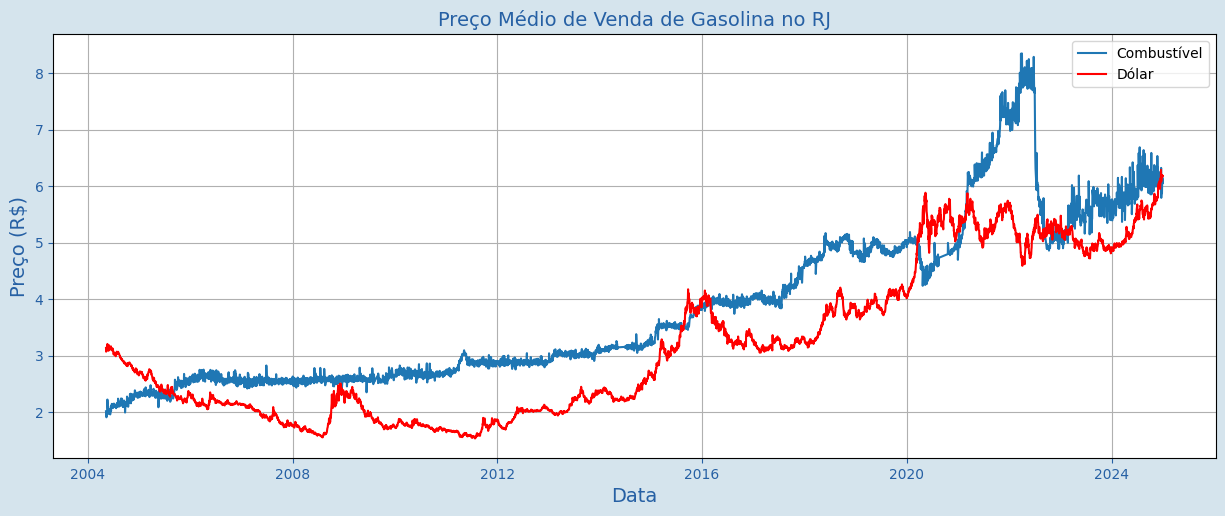

In [ ]:
preco_dolar_combustivel("GASOLINA", "RJ")

In [ ]:
def grafico_dolar_combustivel(combustivel):
  fig, axes = plt.subplots(2, 3, figsize=(15, 9), dpi=100)

  fig.suptitle("Preço Médio - " +  combustivel.title() + " por Estado", color="#000")

  estados = df["Estado - Sigla"].unique().tolist()

  for estado in estados:
    df_produto = df[df["Produto"] == combustivel]
    df_produto_estado = df_produto[df_produto["Estado - Sigla"] == estado]

    df_media_por_dia = df_produto_estado.groupby("Data da Coleta")["Valor de Venda"].mean()
    df_media_por_dia = df_media_por_dia.reset_index().rename(columns={"Data da Coleta": "Data", "Valor de Venda": "Preço de Venda"})

    linha = int(estados.index(estado)/3)
    coluna = estados.index(estado)%3

    sns.lineplot(df_media_por_dia, x="Data", y="Preço de Venda", label="Combustível", ax=axes[linha][coluna])
    sns.lineplot(df_dolar, x="Data", y="Último", color="#FF0000", label='Dólar', ax=axes[linha][coluna])

    fig.patch.set_facecolor("#d5e4ed")
    axes[linha][coluna].set_title("Preço Médio de Venda de " + combustivel.title() + " no " + estado, color='#2660A4', fontsize=10)
    axes[linha][coluna].tick_params(axis='x', colors='#2660A4')
    axes[linha][coluna].tick_params(axis='y', colors='#2660A4')
    axes[linha][coluna].set_xlabel("Data", color='#2660A4', fontsize=14)
    axes[linha][coluna].set_ylabel("Preço (R$)", color='#2660A4', fontsize=14)

    axes[linha][coluna].grid(True, linestyle="--", alpha=0.7)
  # Está removendo um dos estados do gráfico
  # fig.delaxes(axes[1, 2])
  fig.tight_layout()
  plt.show()

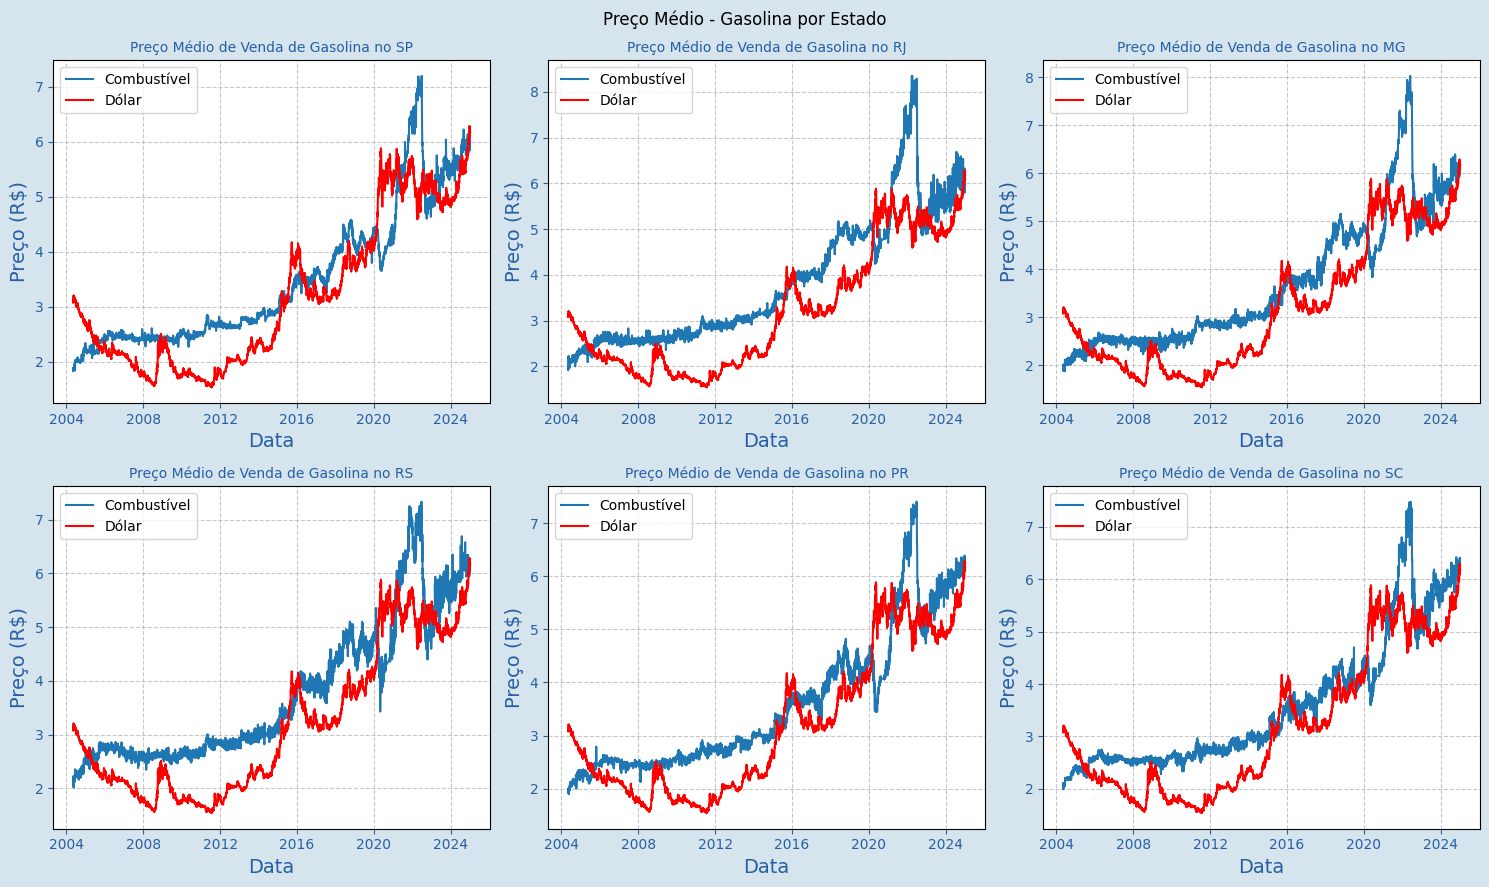

In [ ]:
grafico_dolar_combustivel("GASOLINA")

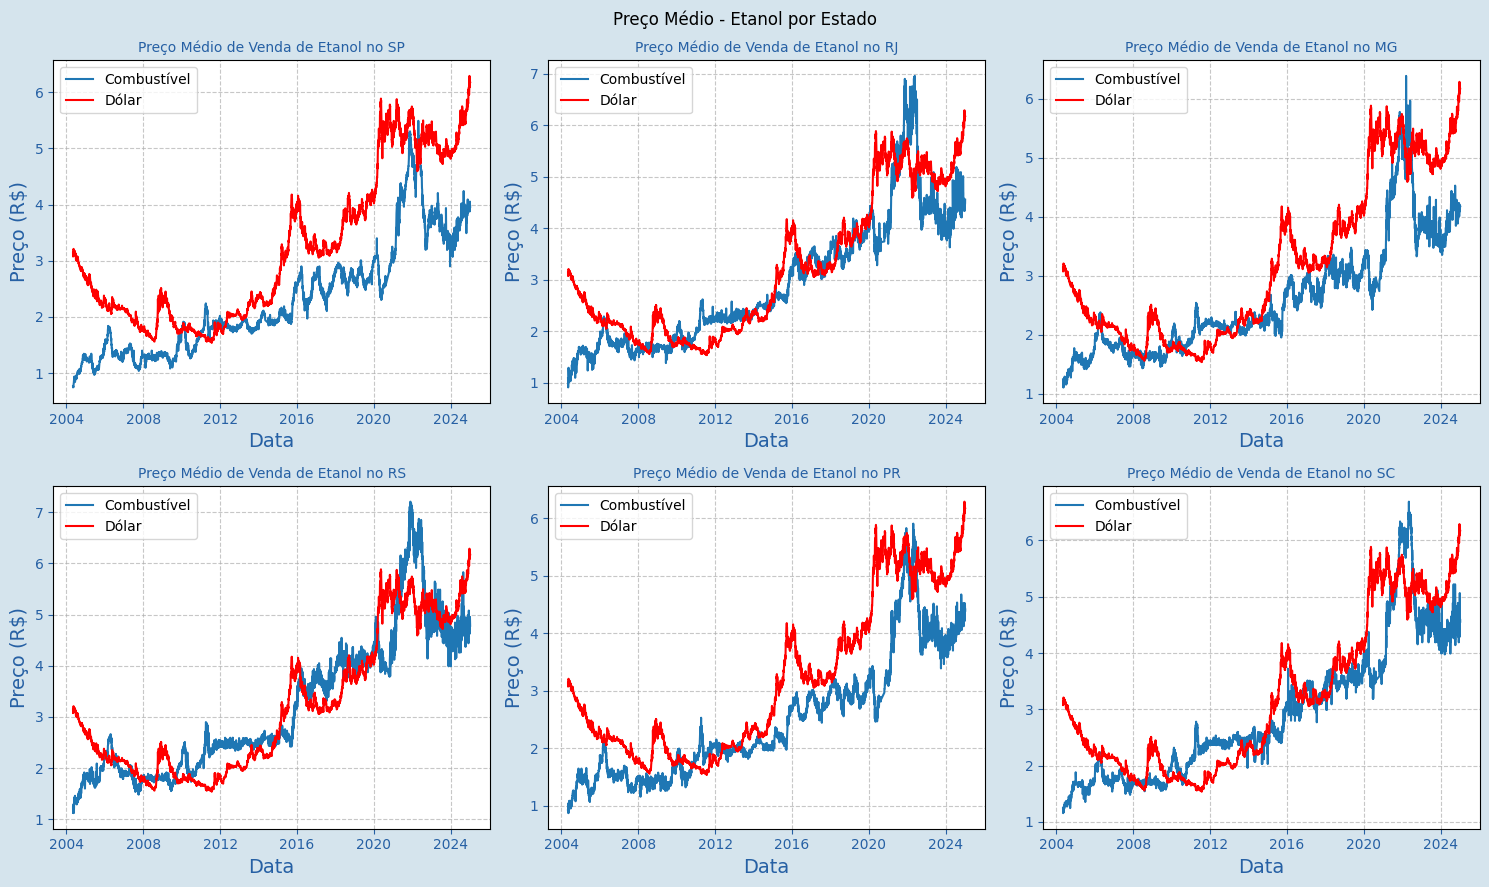

In [ ]:
grafico_dolar_combustivel("ETANOL")

#Testando uma Regressão Linear

##Pré Processamento

In [ ]:
combustivel = "GASOLINA"
estado = "RJ"

df_produto = df[df["Produto"] == combustivel]
df_produto_estado = df_produto[df_produto["Estado - Sigla"] == estado]

df_media_por_dia = df_produto_estado.groupby("Data da Coleta")["Valor de Venda"].mean()
df_media_por_dia = df_media_por_dia.reset_index().rename(columns={"Data da Coleta": "Data", "Valor de Venda": "Preço de Venda"})

# Filtrando as datas que aparecem nos dois DataFrames
z = set(df_dolar["Data"]).intersection(set(df_media_por_dia["Data"]))
df_dolar_filtrado = df_dolar[df_dolar["Data"].isin(z)]
df_media_por_dia = df_media_por_dia[df_media_por_dia["Data"].isin(z)]

X = df_dolar_filtrado['Último'].sort_index(ascending=False).values.reshape((-1, 1))
y = df_media_por_dia['Preço de Venda'].values.reshape((-1, 1))

##Dividindo o dataset em Training set e Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

##Treinando o modelo

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Prevendo os valores

In [ ]:
y_pred = regressor.predict(X_test)

##Visualizando os resultados do Conjunto de Treino

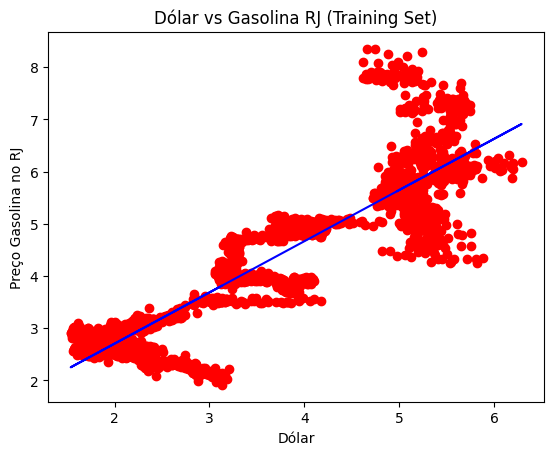

In [ ]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Dólar vs Gasolina RJ (Training Set)")
plt.xlabel("Dólar")
plt.ylabel("Preço Gasolina no RJ")
plt.show()

##Visualizando os resultados do Conjunto de Teste

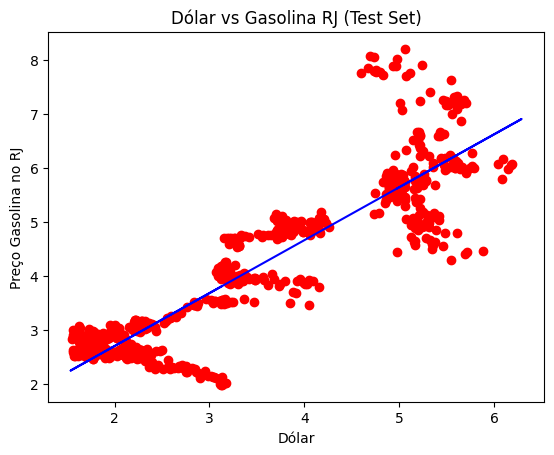

In [ ]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Dólar vs Gasolina RJ (Test Set)")
plt.xlabel("Dólar")
plt.ylabel("Preço Gasolina no RJ")
plt.show()

In [ ]:
# R² score = 1 - RSS/TSS (values between 0 and 1)
score = regressor.score(X_test, y_test)
print(f"The accuracy of the model is {round(score * 100, 2)}%")

The accuracy of the model is 80.43%


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, regressor.predict(X_test))
mae

0.436321885374409

##Prevendo o preço do combustível através do Dólar

In [ ]:
preco_dolar = 5.5
regressor.predict(np.array([[preco_dolar]]))

array([[6.13703334]])

In [ ]:
import pandas as pd

data_petroleo = pd.read_csv('https://storage.googleapis.com/historico_preco/Dados%20Hist%C3%B3ricos%20Petr%C3%B3leo.csv')

data_petroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      5380 non-null   object
 1   Último    5380 non-null   object
 2   Abertura  5380 non-null   object
 3   Máxima    5380 non-null   object
 4   Mínima    5380 non-null   object
 5   Vol.      5378 non-null   object
dtypes: object(6)
memory usage: 252.3+ KB


In [ ]:

data_petroleo['Data'] = pd.to_datetime(data_petroleo['Data'], format='%d.%m.%Y')
data_petroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      5380 non-null   datetime64[ns]
 1   Último    5380 non-null   object        
 2   Abertura  5380 non-null   object        
 3   Máxima    5380 non-null   object        
 4   Mínima    5380 non-null   object        
 5   Vol.      5378 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 252.3+ KB


In [ ]:
data_petroleo.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2025-03-20,"72,26","72,29","72,31","70,54","287,01K"
1,2025-03-19,"70,78","70,47","71,25","69,9","248,39K"
2,2025-03-18,"70,56","70,91","72,19","70,27","315,33K"
3,2025-03-17,"71,07","70,7","71,8","70,68","267,54K"
4,2025-03-14,"70,58","70,16","70,75","69,93","238,55K"


In [ ]:
data_petroleo['Último'] = data_petroleo['Último'].str.replace(',', '.').astype('float64')

In [ ]:
data_petroleo.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2025-03-20,72.26,"72,29","72,31","70,54","287,01K"
1,2025-03-19,70.78,"70,47","71,25","69,9","248,39K"
2,2025-03-18,70.56,"70,91","72,19","70,27","315,33K"
3,2025-03-17,71.07,"70,7","71,8","70,68","267,54K"
4,2025-03-14,70.58,"70,16","70,75","69,93","238,55K"


In [ ]:
# Limitando os dados para facilitar a visualização
data_petroleo = data_petroleo[data_petroleo['Data'].dt.year >= 2018].reset_index(drop=True)

datas_intersec = set(data_petroleo["Data"]).intersection(set(df_media_por_dia["Data"]))

data_petroleo = data_petroleo[data_petroleo["Data"].isin(datas_intersec)]\
  .sort_values(by="Data", ascending=True)

df_dolar_filtrado_petroleo = df_dolar_filtrado[df_dolar_filtrado["Data"].isin(datas_intersec)]\
  .sort_values(by="Data", ascending=True).reset_index(drop=True)

data_petroleo['YearMonth'] = data_petroleo['Data'].dt.to_period('M')
data_petroleo = data_petroleo.groupby('YearMonth').first().reset_index(drop=True)
data_petroleo['Valor Real'] = data_petroleo['Último'] * df_dolar_filtrado_petroleo['Último']

datas_intersec = set(data_petroleo["Data"]).intersection(set(df_media_por_dia["Data"]))

data_petroleo.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Valor Real
0,2018-01-02,66.57,"66,55","67,29","66,24","211,74K",216.938316
1,2018-02-01,69.65,69,"69,97","68,81","336,92K",225.450085
2,2018-03-01,63.83,"64,57","65,04","63,19","340,97K",206.451752
3,2018-04-02,67.64,"69,32","70,04","67,49","190,05K",218.396032
4,2018-05-01,73.13,"74,65","74,98","72,74","360,97K",237.540866


## Comparação Gasolina x Etanol x Barril de Petróleo

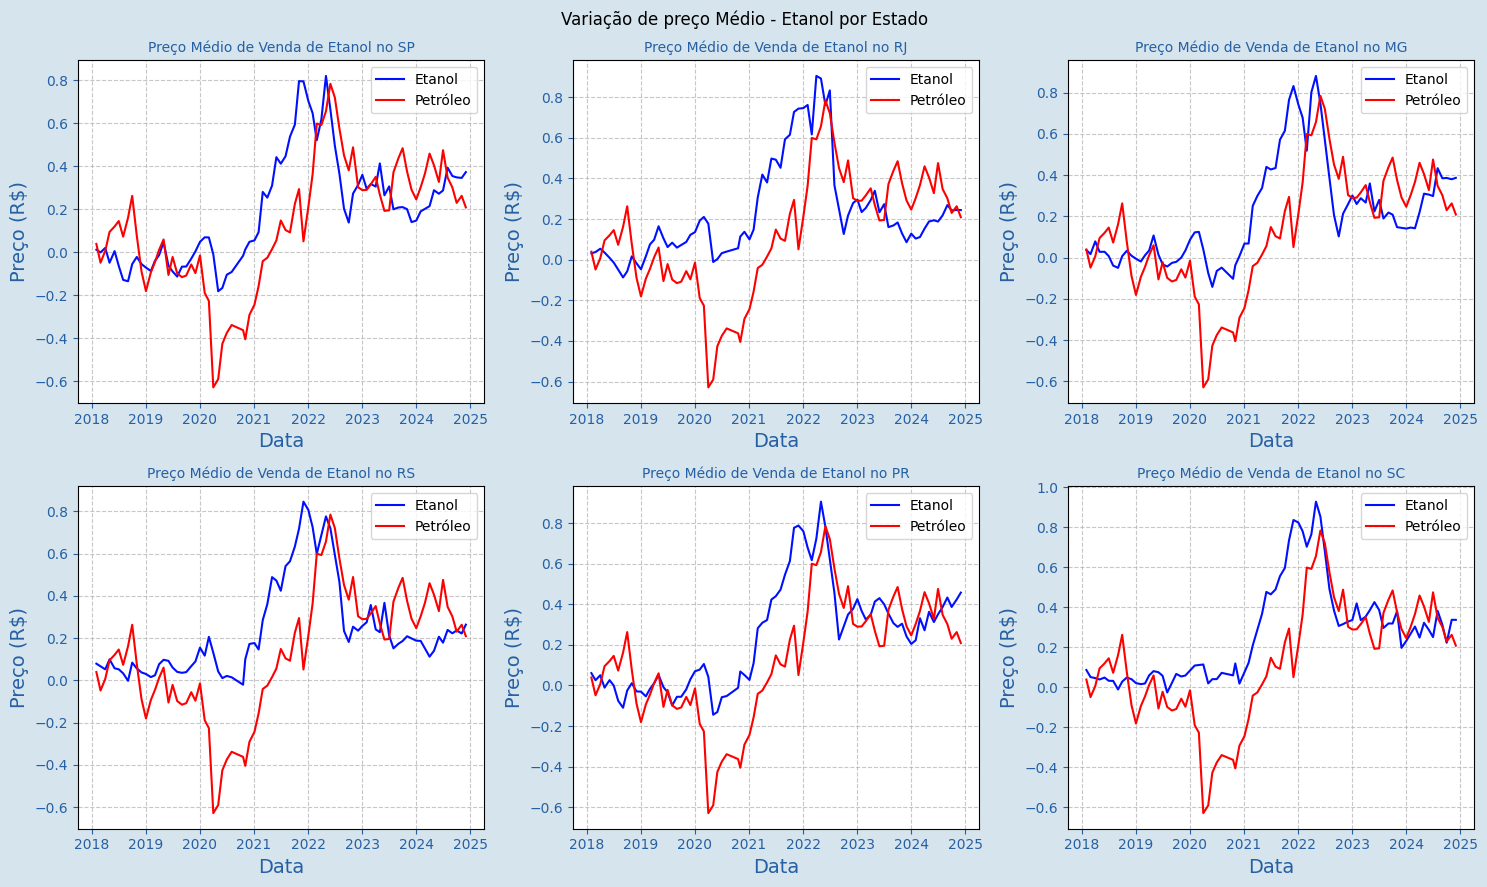

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9), dpi=100)

fig.suptitle(f"Variação de preço Médio - Etanol por Estado", color="#000")

estados = df["Estado - Sigla"].unique().tolist()
df_intersec_petroleo = df[df["Data da Coleta"].isin(datas_intersec)]

for estado in estados:
  df_produto = df_intersec_petroleo[(df_intersec_petroleo["Produto"] == "GASOLINA") \
                                    | (df_intersec_petroleo["Produto"] == "ETANOL")]
  df_produto_estado = df_produto[df_produto["Estado - Sigla"] == estado]

  df_etanol = df_produto_estado[df_produto_estado["Produto"] == "ETANOL"]
  df_media_etanol = df_etanol.groupby("Data da Coleta")["Valor de Venda"].mean()
  df_gasolina = df_produto_estado[df_produto_estado["Produto"] == "GASOLINA"]
  df_media_gasolina = df_gasolina.groupby("Data da Coleta")["Valor de Venda"].mean()

  df_media_gasolina = df_media_gasolina.reset_index().rename(columns={"Data da Coleta": "Data", "Valor de Venda": "Preço de Venda"})
  df_media_etanol = df_media_etanol.reset_index().rename(columns={"Data da Coleta": "Data", "Valor de Venda": "Preço de Venda"})

  linha = int(estados.index(estado)/3)
  coluna = estados.index(estado)%3

  df_media_gasolina['Variacao'] = df_media_gasolina['Preço de Venda'].pct_change()
  df_media_etanol['Variacao'] = df_media_etanol['Preço de Venda'].pct_change()

  df_media_etanol['Variacao acumulada'] = (1 + df_media_etanol['Variacao']).cumprod() -1
  df_media_gasolina['Variacao acumulada'] = (1 + df_media_gasolina['Variacao']).cumprod() -1

  data_petroleo['Variacao'] = data_petroleo['Valor Real'].pct_change()
  data_petroleo['Variacao acumulada'] = (1 + data_petroleo['Variacao']).cumprod() -1

  # sns.lineplot(df_media_gasolina, x="Data", y="Variacao acumulada", label="Gasolina", ax=axes[linha][coluna])
  sns.lineplot(df_media_etanol, x="Data", y="Variacao acumulada", color="#000FFF", label='Etanol', ax=axes[linha][coluna])
  sns.lineplot(data_petroleo, x="Data", y="Variacao acumulada", color="#FF0000", label='Petróleo', ax=axes[linha][coluna])

  fig.patch.set_facecolor("#d5e4ed")
  axes[linha][coluna].set_title(F"Preço Médio de Venda de Etanol no {estado}", color='#2660A4', fontsize=10)
  axes[linha][coluna].tick_params(axis='x', colors='#2660A4')
  axes[linha][coluna].tick_params(axis='y', colors='#2660A4')
  axes[linha][coluna].set_xlabel("Data", color='#2660A4', fontsize=14)
  axes[linha][coluna].set_ylabel("Preço (R$)", color='#2660A4', fontsize=14)

  axes[linha][coluna].grid(True, linestyle="--", alpha=0.7)
# Está removendo um dos estados (SC) do gráfico
# fig.delaxes(axes[1, 2])
fig.tight_layout()
plt.show()

## Análise IPCA

In [ ]:
import pandas as pd

ipca = pd.read_csv("https://storage.googleapis.com/historico_preco/ipca.csv")
ipca.head()

,referencia,ano,mes,ano_mes,ipca_variacao,selic_ano
0,2004-01,2004,1,200401,0.76,16.32
1,2004-02,2004,2,200402,0.61,16.30
2,2004-03,2004,3,200403,0.47,16.19
3,2004-04,2004,4,200404,0.37,15.96
4,2004-05,2004,5,200405,0.51,15.77


In [ ]:
ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   referencia     233 non-null    object 
 1   ano            233 non-null    int64  
 2   mes            233 non-null    int64  
 3   ano_mes        233 non-null    int64  
 4   ipca_variacao  233 non-null    float64
 5   selic_ano      233 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 11.1+ KB


In [ ]:
mes_str = ipca['mes'].astype(str).str.zfill(2)
ano_str = ipca['ano'].astype(str)
data_str = '01/' + mes_str + '/' + ano_str

ipca['Data'] = pd.to_datetime(data_str, format='%d/%m/%Y')
ipca.head()

,referencia,ano,mes,ano_mes,ipca_variacao,selic_ano,Data
0,2004-01,2004,1,200401,0.76,16.32,2004-01-01
1,2004-02,2004,2,200402,0.61,16.30,2004-02-01
2,2004-03,2004,3,200403,0.47,16.19,2004-03-01
3,2004-04,2004,4,200404,0.37,15.96,2004-04-01
4,2004-05,2004,5,200405,0.51,15.77,2004-05-01


In [ ]:
ipca.drop(columns=['referencia', 'ano', 'mes', 'ano_mes'], inplace=True)
ipca.head()

,ipca_variacao,selic_ano,Data
0,0.76,16.32,2004-01-01
1,0.61,16.30,2004-02-01
2,0.47,16.19,2004-03-01
3,0.37,15.96,2004-04-01
4,0.51,15.77,2004-05-01


In [ ]:
# ipca = ipca[ipca['Data'].dt.year >= 2018].reset_index(drop=True)

In [ ]:
ipca['ipca_acumulado'] = (1 + (ipca['ipca_variacao'] / 100)).cumprod() - 1
ipca.head()

,ipca_variacao,selic_ano,Data,ipca_acumulado
0,0.76,16.32,2004-01-01,0.007600
1,0.61,16.30,2004-02-01,0.013746
2,0.47,16.19,2004-03-01,0.018511
3,0.37,15.96,2004-04-01,0.022279
4,0.51,15.77,2004-05-01,0.027493


In [ ]:
ipca.tail()

,ipca_variacao,selic_ano,Data,ipca_acumulado
223,-0.36,13.58,2022-08-01,1.865669
224,-0.29,13.65,2022-09-01,1.857359
225,0.59,13.65,2022-10-01,1.874217
226,0.41,13.65,2022-11-01,1.886001
227,0.62,13.65,2022-12-01,1.903895


In [ ]:
df_media_gasolina.tail()

,Data,Preço de Venda,Variacao,var_acumulada
146,2022-08-01,5.679717,-0.106963,1.695642
164,2022-09-01,5.272258,-0.071739,1.502258
183,2022-10-03,4.788824,-0.091694,1.272816
202,2022-11-01,4.887857,0.020680,1.319818
221,2022-12-05,5.141351,0.051862,1.440129


In [ ]:
ipca = ipca[ipca['Data'].dt.year < 2023].reset_index(drop=True)

     ipca_variacao  selic_ano       Data  ipca_acumulado
0             0.76      16.32 2004-01-01        0.007600
1             0.61      16.30 2004-02-01        0.013746
2             0.47      16.19 2004-03-01        0.018511
3             0.37      15.96 2004-04-01        0.022279
4             0.51      15.77 2004-05-01        0.027493
..             ...        ...        ...             ...
223          -0.36      13.58 2022-08-01        1.865669
224          -0.29      13.65 2022-09-01        1.857359
225           0.59      13.65 2022-10-01        1.874217
226           0.41      13.65 2022-11-01        1.886001
227           0.62      13.65 2022-12-01        1.903895

[228 rows x 4 columns]


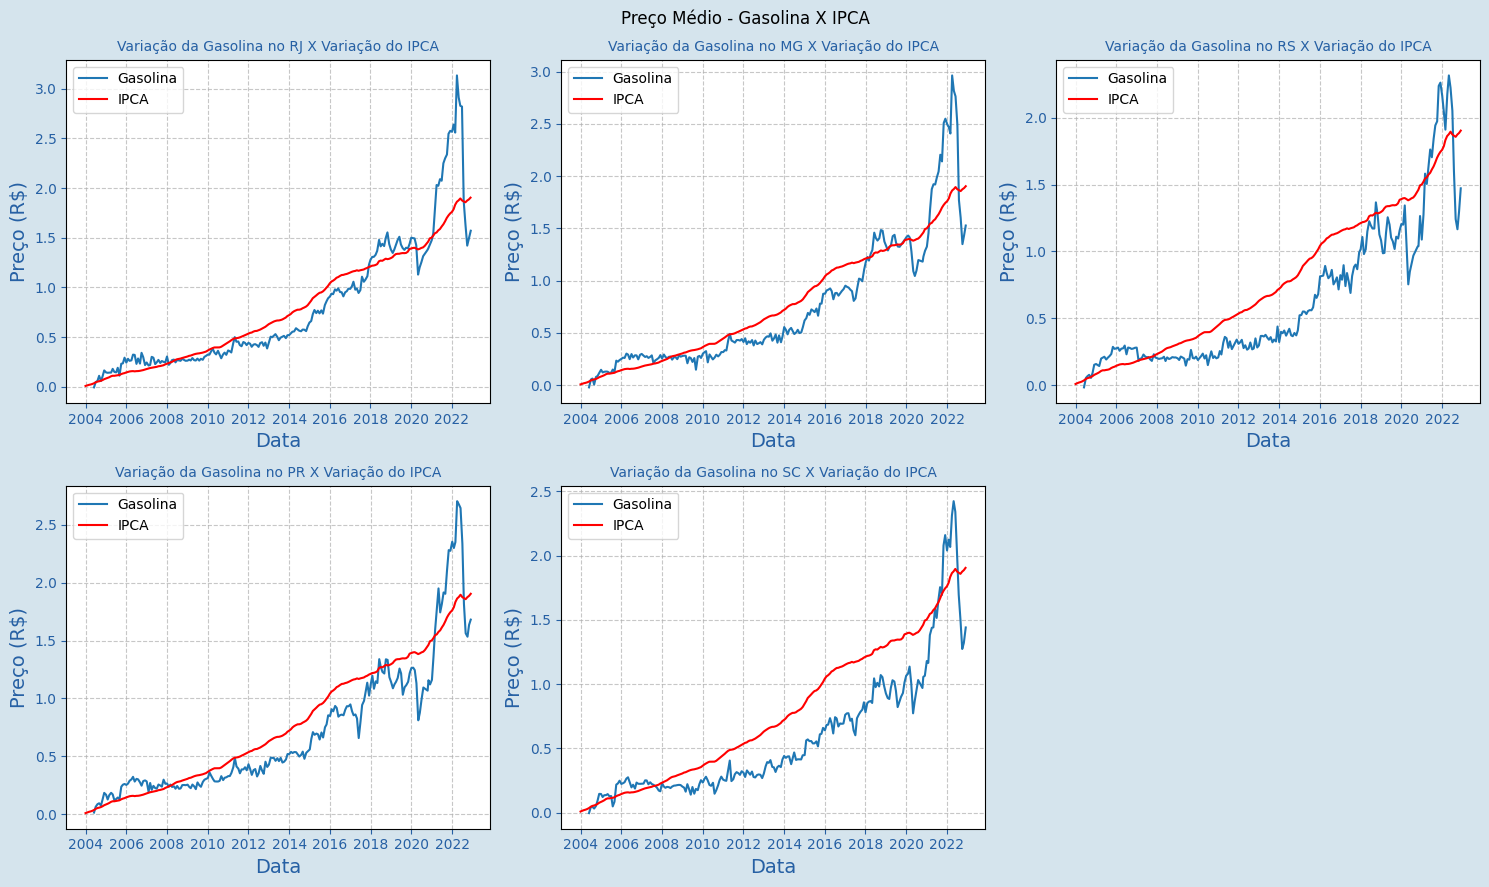

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9), dpi=100)

fig.suptitle(f"Preço Médio - Gasolina X IPCA", color="#000")

# temporariamente removendo SP, para igualar aos outros gráficos
# mudar para "estados" novamente
estados_1 = ['RJ', 'MG', 'RS', 'PR', 'SC']


for estado in estados_1:
  df_produto = df[df["Produto"] == 'GASOLINA']
  df_produto_estado = df_produto[(df_produto["Estado - Sigla"] == estado) & (df_produto["Data da Coleta"].dt.year < 2023)]

  df_media_gasolina = df_produto_estado.groupby("Data da Coleta")["Valor de Venda"].mean()

  df_media_gasolina = df_media_gasolina.reset_index().rename(columns={"Data da Coleta": "Data", "Valor de Venda": "Preço de Venda"})
  # df_media_gasolina = df_media_gasolina[df_media_gasolina['Data'].dt.year < 2023].reset_index(drop=True)
  df_media_gasolina['mes'] = df_media_gasolina['Data'].dt.month
  df_media_gasolina['ano'] = df_media_gasolina['Data'].dt.year
  df_media_gasolina = df_media_gasolina.groupby(['mes', 'ano']).first().reset_index(drop=True)
  df_media_gasolina = df_media_gasolina.sort_values(by='Data', ascending=True)

  df_media_gasolina['Variacao'] = df_media_gasolina['Preço de Venda'].pct_change()
  df_media_gasolina['var_acumulada'] = (1 + df_media_gasolina['Variacao']).cumprod() -1

  linha = int(estados_1.index(estado)/3)
  coluna = estados_1.index(estado)%3

  sns.lineplot(df_media_gasolina, x="Data", y="var_acumulada", label="Gasolina", ax=axes[linha][coluna])
  sns.lineplot(ipca, x="Data", y="ipca_acumulado", color="#FF0000", label='IPCA', ax=axes[linha][coluna])

  fig.patch.set_facecolor("#d5e4ed")
  axes[linha][coluna].set_title(f"Variação da Gasolina no {estado} X Variação do IPCA", color='#2660A4', fontsize=10)
  axes[linha][coluna].tick_params(axis='x', colors='#2660A4')
  axes[linha][coluna].tick_params(axis='y', colors='#2660A4')
  axes[linha][coluna].set_xlabel("Data", color='#2660A4', fontsize=14)
  axes[linha][coluna].set_ylabel("Variação (%)", color='#2660A4', fontsize=14)

  axes[linha][coluna].grid(True, linestyle="--", alpha=0.7)

fig.delaxes(axes[1, 2])
fig.tight_layout()
plt.show()

In [ ]:
df_media_gasolina.head(20)

,Data,Preço de Venda,Variacao,var_acumulada
72,2004-05-10,2.107000,NaN,NaN
91,2004-06-01,2.097087,-0.004705,-0.004705
109,2004-07-05,2.200472,0.049300,0.044363
128,2004-08-02,2.200579,0.000049,0.044414
147,2004-09-01,2.171839,-0.013060,0.030773
165,2004-10-04,2.214409,0.019601,0.050977
184,2004-11-01,2.299396,0.038379,0.091313
203,2004-12-01,2.412844,0.049338,0.145156
0,2005-01-03,2.410530,-0.000959,0.144058
18,2005-02-01,2.361676,-0.020267,0.120872


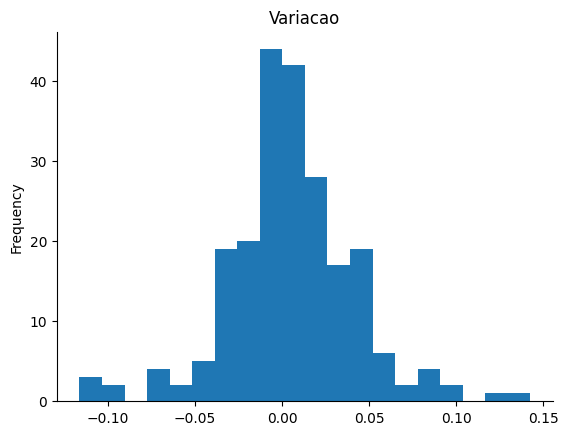

In [ ]:
# @title Variacao

from matplotlib import pyplot as plt
df_media_gasolina['Variacao'].plot(kind='hist', bins=20, title='Variacao')
plt.gca().spines[['top', 'right',]].set_visible(False)